In [1]:
import numpy as np
import pandas as pd

In [2]:
train_path = "train.csv"
test_path = "test.csv"

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

<Axes: xlabel='Fertilizer Name', ylabel='Potassium'>

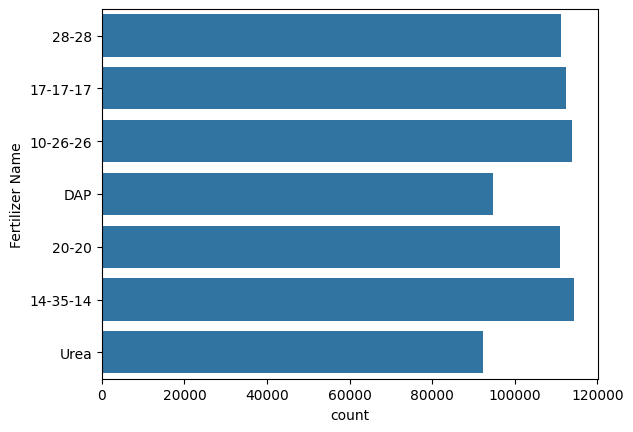

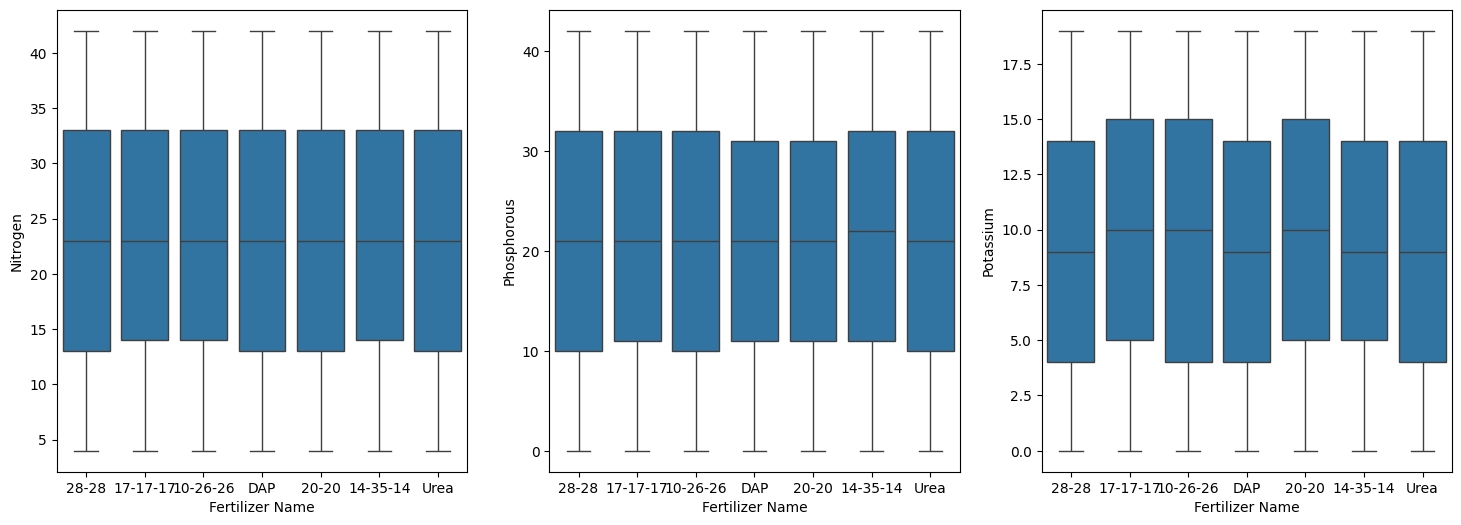

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 目标变量分布
sns.countplot(y='Fertilizer Name', data=train_df)

# 2. 养分与肥料的关系 (最重要)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Fertilizer Name', y='Nitrogen', data=train_df, ax=axes[0])
sns.boxplot(x='Fertilizer Name', y='Phosphorous', data=train_df, ax=axes[1])
sns.boxplot(x='Fertilizer Name', y='Potassium', data=train_df, ax=axes[2])


<Axes: xlabel='Fertilizer Name', ylabel='Crop Type'>

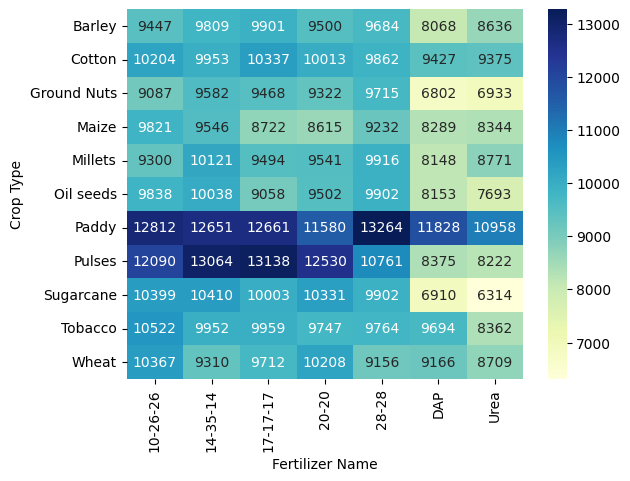

In [5]:

print("\n")

# 3. 类别特征热力图
pivot = train_df.pivot_table(index='Crop Type', columns='Fertilizer Name', aggfunc='size', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')

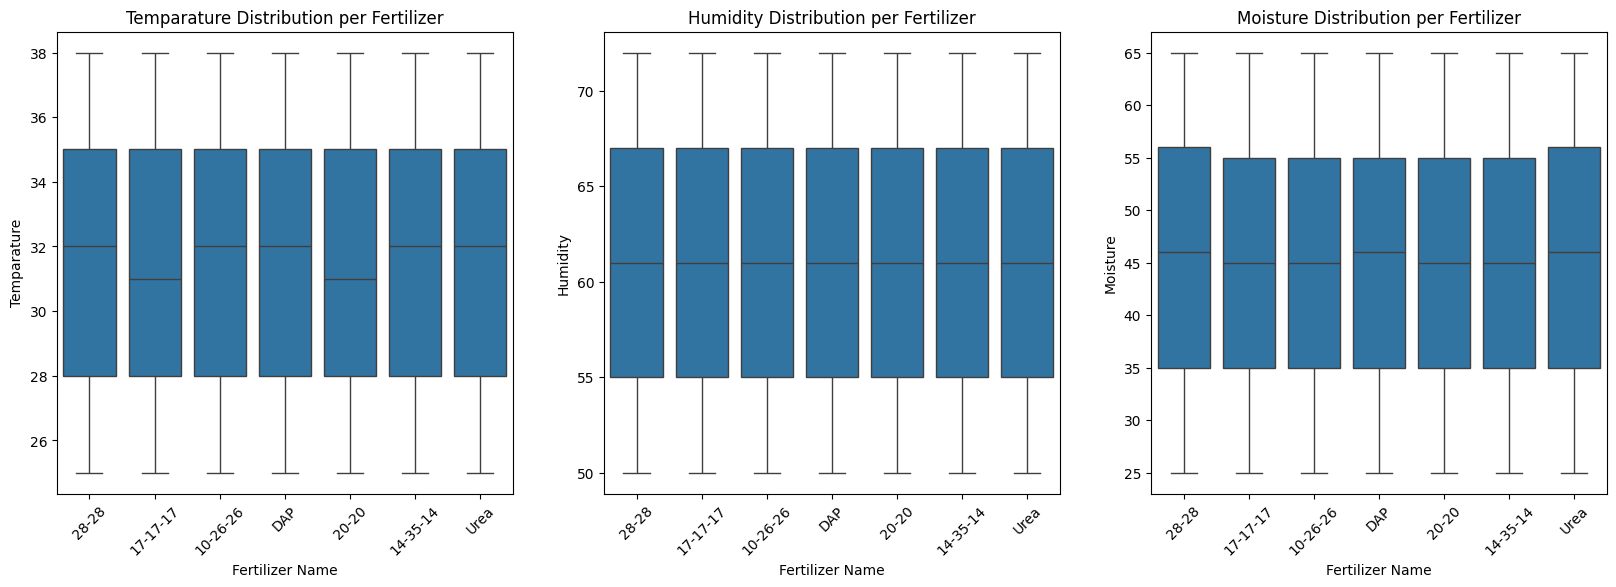

In [6]:
# 1. 环境特征箱线图
env_features = ['Temparature', 'Humidity', 'Moisture']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(env_features):
    sns.boxplot(x='Fertilizer Name', y=col, data=train_df, ax=axes[i])
    axes[i].set_title(f'{col} Distribution per Fertilizer')
    axes[i].tick_params(axis='x', rotation=45)


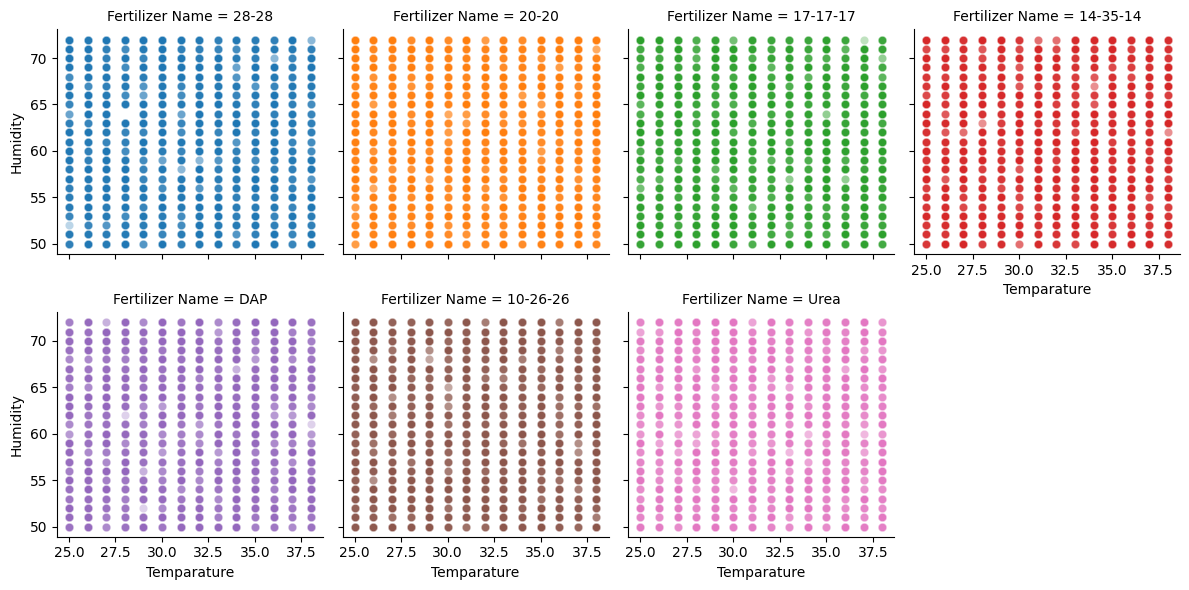

In [7]:
# 将每种肥料分在不同的子图里看分布
g = sns.FacetGrid(train_df.sample(20000), col="Fertilizer Name", col_wrap=4, hue="Fertilizer Name")
g.map(sns.scatterplot, "Temparature", "Humidity", alpha=0.3)

In [11]:
unique_soils = train_df['Soil Type'].unique()
print(unique_soils)
unique_soils = train_df['Crop Type'].unique()
print(unique_soils)

['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']


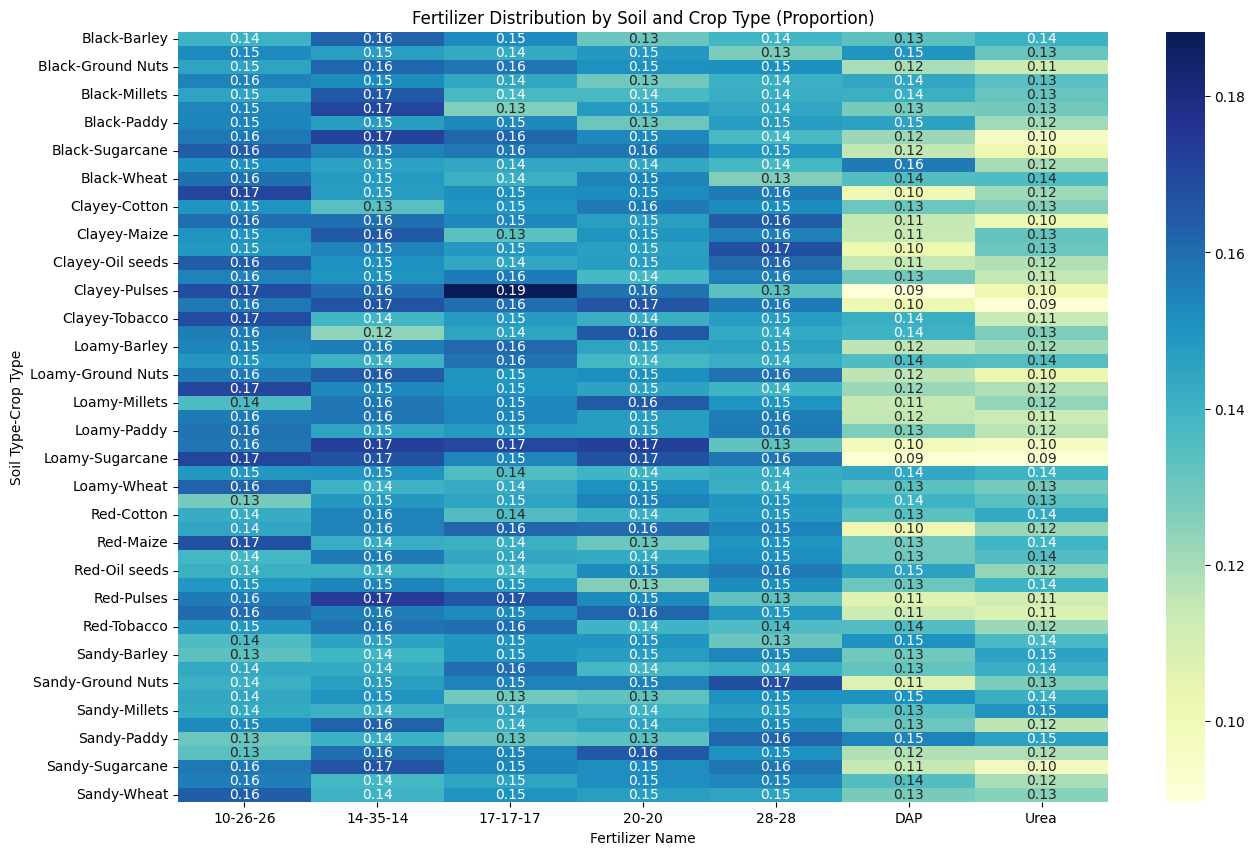

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 创建交叉表：统计每个 Soil-Crop 组合下各 Fertilizer 的出现次数
cross_tab = pd.crosstab(index=[train_df['Soil Type'], train_df['Crop Type']], 
                        columns=train_df['Fertilizer Name'])

# 2. 转化为百分比（行归一化），这样更易于观察分布倾向
cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# 3. 绘制热力图
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab_pct, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Fertilizer Distribution by Soil and Crop Type (Proportion)')
plt.show()

In [10]:
# 观察每个组合中最常用的肥料及其占比
dist_summary = train_df.groupby(['Soil Type', 'Crop Type'])['Fertilizer Name'].value_counts(normalize=True).unstack().fillna(0)

# 打印前几行查看
print(dist_summary.head())

Fertilizer Name        10-26-26  14-35-14  17-17-17     20-20     28-28  \
Soil Type Crop Type                                                       
Black     Barley       0.140208  0.162671  0.152947  0.131238  0.138851   
          Cotton       0.152895  0.146828  0.142912  0.148825  0.127246   
          Ground Nuts  0.145513  0.161548  0.157878  0.151256  0.151655   
          Maize        0.155082  0.152339  0.143641  0.129849  0.141055   
          Millets      0.145119  0.165172  0.137655  0.137655  0.141802   

Fertilizer Name             DAP      Urea  
Soil Type Crop Type                        
Black     Barley       0.133499  0.140585  
          Cotton       0.149977  0.131316  
          Ground Nuts  0.119505  0.112645  
          Maize        0.143798  0.134237  
          Millets      0.141274  0.131323  
